In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools

In [3]:
df=pd.read_excel('Actors.xlsx')

In [12]:
df.head(5)

,title,year,critics_score,audience_score,avg_score,genres,name,Budget (in $),WorldwideSales,ROI
0,Avatar,2009,81,82,81.5,Sci-Fi,Sam Worthington,237000000,2923706026,11.336312
1,Avatar,2009,81,82,81.5,Sci-Fi,Zoe Saldana,237000000,2923706026,11.336312
2,Avatar,2009,81,82,81.5,Sci-Fi,Sigourney Weaver,237000000,2923706026,11.336312
3,Avatar,2009,81,82,81.5,Sci-Fi,Stephen Lang,237000000,2923706026,11.336312
4,Avatar,2009,81,82,81.5,Sci-Fi,Michelle Rodriguez,237000000,2923706026,11.336312


In [13]:
df.columns

Index(['title', 'year', 'critics_score', 'audience_score', 'avg_score',
       'genres', 'name', 'Budget (in $)', 'WorldwideSales', 'ROI'],
      dtype='object')

In [14]:
df.isnull().sum()

title             0
year              0
critics_score     0
audience_score    0
avg_score         0
genres            0
name              0
Budget (in $)     0
WorldwideSales    0
ROI               0
dtype: int64

In [15]:
df.shape

(14228, 10)

In [16]:
df.avg_score.describe()

count    14228.000000
mean        70.032612
std         19.440037
min         13.500000
25%         56.000000
50%         75.500000
75%         86.500000
max         97.500000
Name: avg_score, dtype: float64

In [17]:
# Group by title and get top 25 by sales
top_25_movies_sales = df.groupby('title')['WorldwideSales'].mean().nlargest(25).index.tolist()

sales_subset = df[df['title'].isin(top_25_movies_sales)]

print(sales_subset)

                                             title  year  critics_score  \
0                                           Avatar  2009             81   
1                                           Avatar  2009             81   
2                                           Avatar  2009             81   
3                                           Avatar  2009             81   
4                                           Avatar  2009             81   
...                                            ...   ...            ...   
1649  Harry Potter and the Deathly Hallows: Part 1  2010             76   
1650  Harry Potter and the Deathly Hallows: Part 1  2010             76   
1651  Harry Potter and the Deathly Hallows: Part 1  2010             76   
1652  Harry Potter and the Deathly Hallows: Part 1  2010             76   
1653  Harry Potter and the Deathly Hallows: Part 1  2010             76   

      audience_score  avg_score              genres                name  \
0                 82    

In [18]:
# Group by title and get top 25 by scores
top_25_movies_score = df.groupby('title')['avg_score'].mean().nlargest(25).index.tolist()

score_subset = df[df['title'].isin(top_25_movies_score)]

print(score_subset)

                   title  year  critics_score  audience_score  avg_score  \
64     Avengers: Endgame  2019             94              90       92.0   
65     Avengers: Endgame  2019             94              90       92.0   
66     Avengers: Endgame  2019             94              90       92.0   
67     Avengers: Endgame  2019             94              90       92.0   
68     Avengers: Endgame  2019             94              90       92.0   
...                  ...   ...            ...             ...        ...   
13887   12 Years a Slave  2013             95              90       92.5   
13888   12 Years a Slave  2013             95              90       92.5   
13889   12 Years a Slave  2013             95              90       92.5   
13890   12 Years a Slave  2013             95              90       92.5   
13891   12 Years a Slave  2013             95              90       92.5   

          genres                name  Budget (in $)  WorldwideSales       ROI  
64     

In [22]:
# 1. Group by name, count unique titles, get top 25
top_25_actors = df.groupby('name')['title'].nunique().nlargest(25).index.tolist()

# 2. Filter the original dataframe to keep only these actors
df_top_25 = df[df['name'].isin(top_25_actors)]

df_top_25['name'].unique()

array(['Chris Evans', 'Paul Rudd', 'Bradley Cooper',
       'Benedict Cumberbatch', 'Chris Pratt', 'Samuel L. Jackson',
       'Daniel Radcliffe', 'Rupert Grint', 'Emma Watson', 'Alan Rickman',
       'Robbie Coltrane', 'Helena Bonham Carter', 'Gary Oldman',
       'Julie Walters', 'Ian McKellen', 'Cate Blanchett', 'Orlando Bloom',
       'Hugo Weaving', 'Andy Serkis', 'Christopher Lee', 'Morgan Freeman',
       'Johnny Depp', 'Kristen Wiig', 'Timothy Spall', 'Tom Cruise'],
      dtype=object)

In [23]:
# 1. Group by name, count unique titles, get top 25
top_25_actors_sales = sales_subset.groupby('name')['title'].nunique().nlargest(25).index.tolist()

# 2. Filter the original dataframe to keep only these actors
df_top_25_sales = df[df['name'].isin(top_25_actors_sales)]

df_top_25_sales['name'].unique()

array(['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo',
       'Chris Hemsworth', 'Scarlett Johansson', 'Jeremy Renner',
       'Don Cheadle', 'Chadwick Boseman', 'Elizabeth Olsen',
       'Sebastian Stan', 'Chris Pratt', 'Paul Bettany', 'Anthony Mackie',
       'Daniel Radcliffe', 'Rupert Grint', 'Emma Watson', 'Alan Rickman',
       'Robbie Coltrane', 'Helena Bonham Carter', 'Gary Oldman',
       'John Hurt', 'Julie Walters', 'Ian McKellen', 'Hugo Weaving',
       'Christopher Lee'], dtype=object)

In [24]:
# 1. Group by name, count unique titles, get top 25
top_25_actors_score = score_subset.groupby('name')['title'].nunique().nlargest(25).index.tolist()

# 2. Filter the original dataframe to keep only these actors
df_top_25_score = df[df['name'].isin(top_25_actors_score)]

df_top_25_score['name'].unique()

array(['Benedict Wong', 'Benedict Cumberbatch', 'Gary Oldman',
       'Ian McKellen', 'John Rhys-Davies', 'Elijah Wood', 'Liv Tyler',
       'Cate Blanchett', 'Billy Boyd', 'Dominic Monaghan',
       'Orlando Bloom', 'Hugo Weaving', 'Andy Serkis', 'Christopher Lee',
       'Keith Szarabajka', 'Michelle Yeoh', 'John Ratzenberger',
       'Paul Giamatti', 'Hailee Steinfeld', 'Jake Johnson',
       'Brian Tyree Henry', 'Luna Lauren Velez', 'Matt Damon',
       'Bryan Cranston', 'John Mulaney'], dtype=object)

In [26]:
def get_graph(df, min_weight):
    G = nx.Graph()
    # Add nodes
    G.add_nodes_from(df['name'].unique())
    
    # Build full weights first
    # (We have to count everything to know if it's > 1)
    edge_weights = {}
    
    for (title), group in df.groupby("title"):
        actors = group['name'].unique()
        for p1, p2 in itertools.combinations(actors, 2):
            # Sort pair to ensure (A, B) is same as (B, A)
            pair = tuple(sorted((p1, p2)))
            edge_weights[pair] = edge_weights.get(pair, 0) + 1

    # Only add edges that meet criteria
    for (p1, p2), weight in edge_weights.items():
        if weight > min_weight:
            G.add_edge(p1, p2, weight=weight)
            
    return G


In [42]:
G = get_graph(df_top_25_sales,0)

In [43]:
G.number_of_nodes(), G.number_of_edges()

(25, 122)

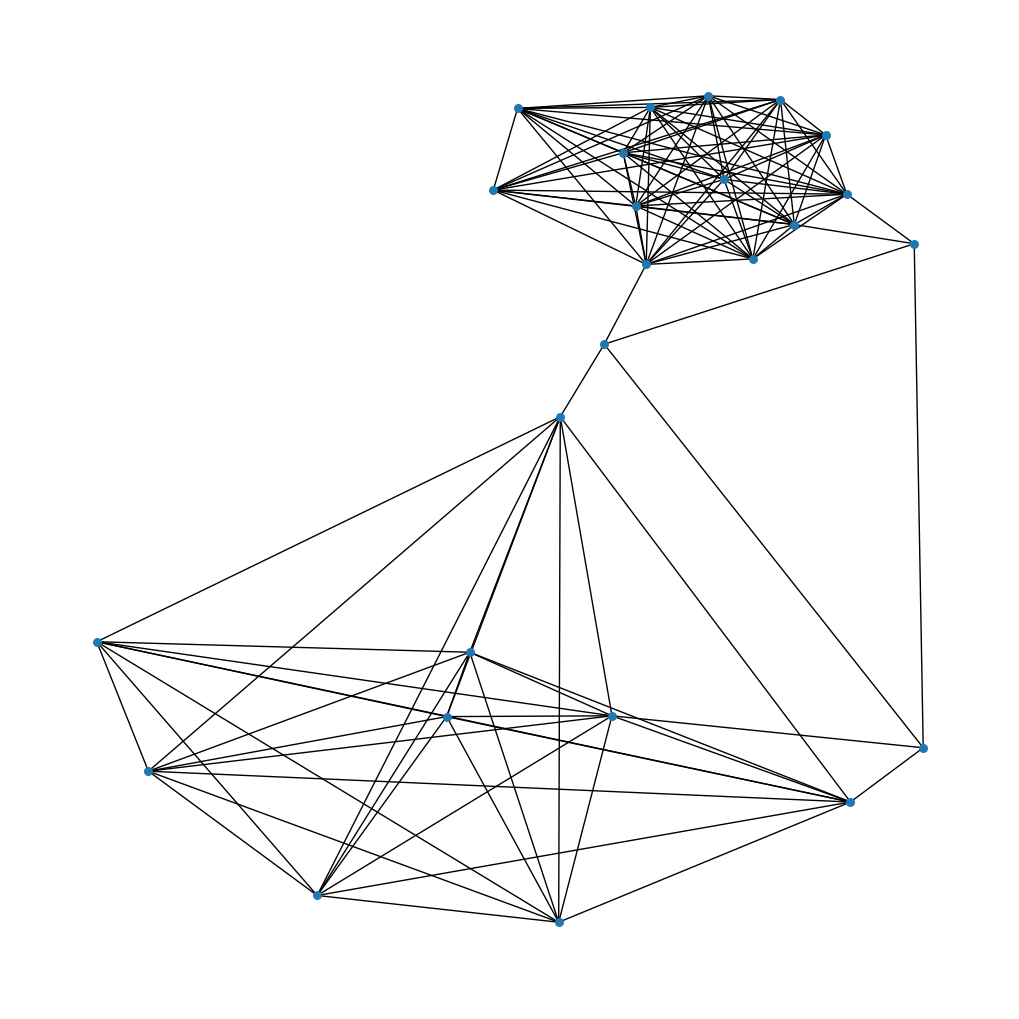

In [44]:
fig = plt.figure(1, figsize=(10, 10))
nx.draw_kamada_kawai(G, node_size=30)
#plt.savefig('/content/drive/MyDrive/Visualization Datasets/HW_5&6_1/Outputs/draw_kamada_kawai.png', dpi=300, bbox_inches='tight')


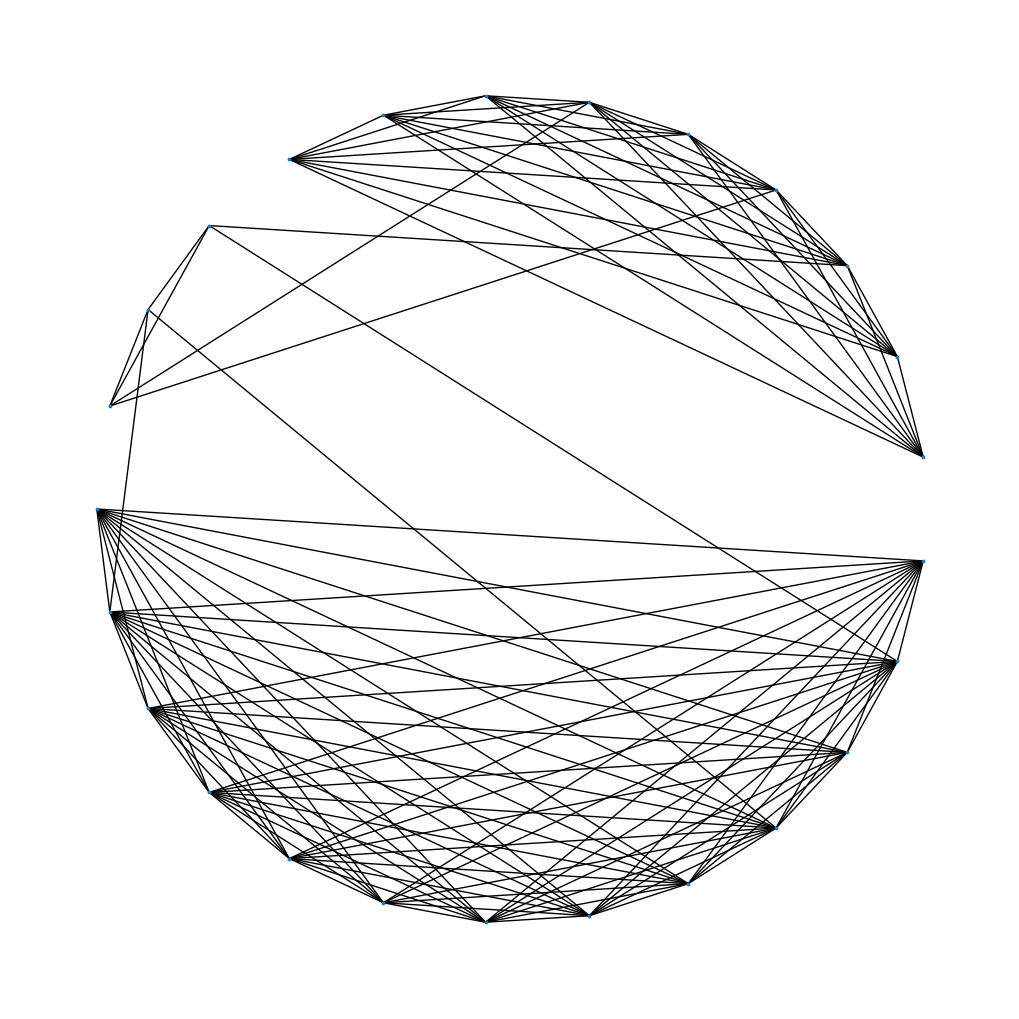

In [45]:
fig = plt.figure(1, figsize=(10, 10))
nx.draw_shell(G, node_size=3)
#plt.savefig('/content/drive/MyDrive/Visualization Datasets/HW_5&6_1/Outputs/draw_shell.png', dpi=300, bbox_inches='tight')

In [46]:
edges = G.edges(data=True)  # Get edges with attributes
edges_list = [(u, v, data) for u, v, data in edges]  # Convert to list of tuples

# Convert to a DataFrame
edges_df = pd.DataFrame(edges_list, columns=['Source', 'Target', 'Attributes'])

# If you want to expand attributes into separate columns
attributes_df = edges_df['Attributes'].apply(pd.Series)
edges_df = pd.concat([edges_df.drop(columns=['Attributes']), attributes_df], axis=1)



In [47]:
edges_df

,Source,Target,weight
0,Robert Downey Jr.,Chris Hemsworth,3
1,Robert Downey Jr.,Mark Ruffalo,3
2,Robert Downey Jr.,Chris Evans,4
3,Robert Downey Jr.,Scarlett Johansson,4
4,Robert Downey Jr.,Jeremy Renner,3
...,...,...,...
117,Gary Oldman,Julie Walters,3
118,John Hurt,Julie Walters,3
119,Ian McKellen,Hugo Weaving,6
120,Ian McKellen,Christopher Lee,6


In [48]:
file_name = 'top_25_actors_sales'

In [51]:
def get_gephi_node_df(df):
  temp = df
  temp = temp.rename(columns={'name':"Label"})
  temp["Id"] = temp.Label
  return temp

In [52]:
nodes_data = df_top_25_sales.loc[df_top_25_sales.groupby("name")['avg_score'].idxmax()]

nodes_df = get_gephi_node_df(nodes_data)


In [53]:
nodes_df

,title,year,critics_score,audience_score,avg_score,genres,Label,Budget (in $),WorldwideSales,ROI,Id
524,Harry Potter and the Deathly Hallows: Part 2,2011,96,89,92.5,Fantasy,Alan Rickman,125000000,1342359942,9.738880,Alan Rickman
3675,Captain America: The Winter Soldier,2014,90,92,91.0,Action,Anthony Mackie,170000000,714421503,3.202479,Anthony Mackie
84,Avengers: Endgame,2019,94,90,92.0,Action,Chadwick Boseman,356000000,2799439100,6.863593,Chadwick Boseman
65,Avengers: Endgame,2019,94,90,92.0,Action,Chris Evans,356000000,2799439100,6.863593,Chris Evans
67,Avengers: Endgame,2019,94,90,92.0,Action,Chris Hemsworth,356000000,2799439100,6.863593,Chris Hemsworth
2984,Guardians of the Galaxy,2014,91,92,91.5,Sci-Fi,Chris Pratt,170000000,773350147,3.549119,Chris Pratt
1923,The Lord of the Rings: The Two Towers,2002,95,95,95.0,Fantasy,Christopher Lee,94000000,947944270,9.084514,Christopher Lee
520,Harry Potter and the Deathly Hallows: Part 2,2011,96,89,92.5,Fantasy,Daniel Radcliffe,125000000,1342359942,9.738880,Daniel Radcliffe
72,Avengers: Endgame,2019,94,90,92.0,Action,Don Cheadle,356000000,2799439100,6.863593,Don Cheadle
92,Avengers: Endgame,2019,94,90,92.0,Action,Elizabeth Olsen,356000000,2799439100,6.863593,Elizabeth Olsen


In [54]:
nodes_df.to_csv(f"/Users/ockseb/Library/CloudStorage/OneDrive-RutgersUniversity/Grad/Fall 2025/Data Analysis & Visualization/Final Project/{file_name}_nodes.csv", index=False)

In [55]:
edges_df.to_csv(f"/Users/ockseb/Library/CloudStorage/OneDrive-RutgersUniversity/Grad/Fall 2025/Data Analysis & Visualization/Final Project/{file_name}_edges.csv", index=False)